In [ ]:
!ls -R /content/domain_data

/content/domain_data:
content

/content/domain_data/content:
final_dataset

/content/domain_data/content/final_dataset:
test  train  val

/content/domain_data/content/final_dataset/test:
benign	malignant  normal

/content/domain_data/content/final_dataset/test/benign:
src_benign_000003.png  src_benign_000121.png	src_benign_ORPE_017.png
src_benign_000021.png  src_benign_000122.png	src_benign_OSCU_013.png
src_benign_000035.png  src_benign_ALWI_007.png	src_benign_OSCU_019.png
src_benign_000051.png  src_benign_ALWI_022.png	src_benign_OSCU_021.png
src_benign_000052.png  src_benign_ANFO_004.png	src_benign_PLBA_019.png
src_benign_000073.png  src_benign_ANFO_006.png	src_benign_POFR_011.png
src_benign_000074.png  src_benign_ANFO_009.png	src_benign_RARE_003.png
src_benign_000089.png  src_benign_ASSC_003.png	src_benign_RARE_004.png
src_benign_000093.png  src_benign_CAWI_011.png	src_benign_SHST_005.png
src_benign_000096.png  src_benign_COST_011.png	src_benign_STSP_019.png
src_benign_000097.png  sr

In [ ]:
import os
for cls in ['benign', 'malignant', 'normal']:
    path = f"/content/domain_data/content/final_dataset/train/{cls}"
    if os.path.exists(path):
        print(f"Train - {cls}: {len(os.listdir(path))} görsel")

Train - benign: 945 görsel
Train - malignant: 489 görsel
Train - normal: 1392 görsel


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
import os

# --- 0. ÖNCEKİ MODELİ YÜKLE ---
model_path = "/content/drive/MyDrive/Ara Proje/saved_models/Xception_Results/xception_model_with_BUSI.keras"
model = load_model(model_path)
print("✅ Temel Xception modeli yüklendi.")

# --- 1. Zip Dosyasını Açma ---
zip_path = "/content/drive/MyDrive/Ara Proje/datalar/UCLM_and_DatasetB.zip"
!unzip -q "{zip_path}" -d /content/domain_data

# --- 2. Kayıt Dizini Oluşturma ---
save_dir = "/content/drive/MyDrive/Ara Proje/saved_models/Xception_Results"
os.makedirs(save_dir, exist_ok=True)

# --- 3. Domain Adaptation İçin Veri Hazırlığı (DÜZELTİLEN KISIM) ---
# Verilerin olduğu gerçek alt dizini tanımlıyoruz
BASE_PATH = "/content/domain_data/content/final_dataset"
train_path = os.path.join(BASE_PATH, "train")
val_path = os.path.join(BASE_PATH, "val")

target_datagen = ImageDataGenerator(rescale=1./255)

# Doğrudan train ve val klasörlerini hedef gösteriyoruz
target_train_gen = target_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical'
)

target_val_gen = target_datagen.flow_from_directory(
    val_path,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    shuffle=False
)

print(f"Tespit edilen sınıflar: {target_train_gen.class_indices}")

# --- 4. Modeli Adaptasyon İçin Güncelleme ---
for layer in model.layers:
    layer.trainable = False

for layer in model.layers[-50:]:
    layer.trainable = True

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy', metrics=['accuracy'])

# --- 5. Adaptasyon Eğitimi ---
print("\n🚀 Xception Domain Adaptation Başlıyor...")
model.fit(target_train_gen, validation_data=target_val_gen, epochs=20)

# --- 6. Final Model Kaydı ---
final_save_path = os.path.join(save_dir, "XCEPTION_DomainAD_All_data.keras")
model.save(final_save_path)
print(f"\n✅ Domain Adapted Model Kaydedildi: {final_save_path}")

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 4 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


✅ Temel Xception modeli yüklendi.
Found 2826 images belonging to 3 classes.
Found 127 images belonging to 3 classes.
Tespit edilen sınıflar: {'benign': 0, 'malignant': 1, 'normal': 2}

🚀 Xception Domain Adaptation Başlıyor...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 114s 408ms/step - accuracy: 0.6231 - loss: 0.9139 - val_accuracy: 0.7795 - val_loss: 0.6346
Epoch 2/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 17s 95ms/step - accuracy: 0.9017 - loss: 0.2636 - val_accuracy: 0.8031 - val_loss: 0.6041
Epoch 3/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 17s 95ms/step - accuracy: 0.9715 - loss: 0.0781 - val_accuracy: 0.7795 - val_loss: 0.7836
Epoch 4/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 17s 95ms/step - accuracy: 0.9831 - loss: 0.0519 - val_accuracy: 0.8268 - val_loss: 0.8173
Epoch 5/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 17s 95ms/step - accuracy: 0.9806 - loss: 0.0554 - val_accuracy: 0.8346 - val_loss: 0.8427
Epoch 6/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 17s 95ms/step - accuracy: 0.9879 - loss: 0.0339 - val_accuracy: 0.8504 - val_loss: 0.8394
Epoch 7/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 17s 96ms/step - accuracy: 0.9920 - loss: 0.0268 - val_accuracy: 0.8504 - val_loss: 0.8762
Epoch 8/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 17s 95ms/step - accuracy: 0.9864 - loss: 0.0391 

Found 130 images belonging to 3 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


9/9 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step

--- XCEPTION FINAL TEST RAPORU ---
              precision    recall  f1-score   support

      benign       0.84      0.84      0.84        44
   malignant       0.89      0.74      0.81        23
      normal       0.90      0.95      0.92        63

    accuracy                           0.88       130
   macro avg       0.88      0.84      0.86       130
weighted avg       0.88      0.88      0.88       130



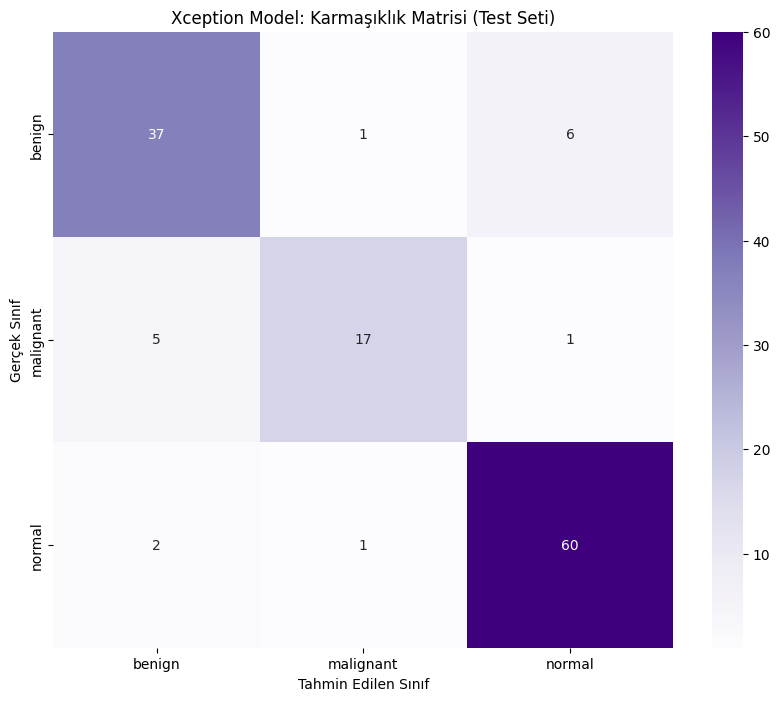

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Test Verisi Yükleyici (Ayrı 'test' klasörünü kullanıyoruz)
test_path = "/content/domain_data/content/final_dataset/test"
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    shuffle=False
)

# 2. Tahminlerin Alınması
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes
labels = list(test_generator.class_indices.keys())

# 3. Raporun Yazdırılması
print("\n--- XCEPTION FINAL TEST RAPORU ---")
print(classification_report(y_true, y_pred, target_names=labels))

# 4. Karmaşıklık Matrisi (Confusion Matrix)
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=labels, yticklabels=labels)
plt.title('Xception Model: Karmaşıklık Matrisi (Test Seti)')
plt.ylabel('Gerçek Sınıf')
plt.xlabel('Tahmin Edilen Sınıf')
plt.show()

In [ ]:
!ls -R /content/deneme_test/

/content/deneme_test/:
deneme

/content/deneme_test/deneme:
b1.png	b2.png	b3.png	m1.png	m2.png	m3.png	n1.png	n2.png	n3.png	n4.png


In [ ]:
# Deneme zipini açalım
!unzip -o -q "/content/deneme.zip" -d /content/deneme_test/

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image

# Dosyaların olduğu tam yolu tanımlıyoruz
ACTUAL_IMAGE_PATH = "/content/deneme_test/deneme"

def simple_predict(model_instance, img_folder):
    class_names = ['Benign', 'Malignant', 'Normal']

    # Klasördeki resim dosyalarını al
    img_paths = [os.path.join(img_folder, f) for f in os.listdir(img_folder)
                 if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    if not img_paths:
        print(f"❌ HATA: {img_folder} içinde resim bulunamadı!")
        return

    print(f"{'Dosya Adı':<15} | {'Model Tahmini':<15}")
    print("-" * 35)

    for img_path in sorted(img_paths): # Dosyaları sırayla (b1, b2, m1...) işle
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img) / 255.0
        x = np.expand_dims(x, axis=0)

        preds = model_instance.predict(x, verbose=0)
        result = class_names[np.argmax(preds)]
        print(f"{os.path.basename(img_path):<15} | {result:<15}")

# Çalıştır
simple_predict(model, ACTUAL_IMAGE_PATH)

Dosya Adı       | Model Tahmini  
-----------------------------------
b1.png          | Benign         
b2.png          | Benign         
b3.png          | Benign         
m1.png          | Malignant      
m2.png          | Benign         
m3.png          | Malignant      
n1.png          | Benign         
n2.png          | Benign         
n3.png          | Normal         
n4.png          | Malignant      


In [ ]:
!ls /tmp/*.h5

ls: cannot access '/tmp/*.h5': No such file or directory


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os

# --- 0. MODELİ YÜKLE ---
model_path = "/content/drive/MyDrive/Ara Proje/saved_models/Xception_Results/xception_model_with_BUSI.keras"
model = load_model(model_path)

# --- 1. VERİ HAZIRLIĞI ---
zip_path = "/content/drive/MyDrive/Ara Proje/datalar/UCLM_and_DatasetB.zip"
!unzip -o -q "{zip_path}" -d /content/domain_data


save_dir = "/content/drive/MyDrive/Ara Proje/saved_models/Xception_Results"
os.makedirs(save_dir, exist_ok=True)

# Ezberlemeyi durduran mekanizma
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

# --- 3. VERİ YÜKLEYİCİLER ---
BASE_PATH = "/content/domain_data/content/final_dataset"
train_path = os.path.join(BASE_PATH, "train")
val_path = os.path.join(BASE_PATH, "val")

target_datagen = ImageDataGenerator(rescale=1./255)

target_train_gen = target_datagen.flow_from_directory(
    train_path, target_size=(224, 224), batch_size=16, class_mode='categorical'
)
target_val_gen = target_datagen.flow_from_directory(
    val_path, target_size=(224, 224), batch_size=16, class_mode='categorical', shuffle=False
)

# --- 4. MODEL GÜNCELLEME ---
for layer in model.layers: layer.trainable = False
for layer in model.layers[-50:]: layer.trainable = True

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy', metrics=['accuracy'])

# --- 5. ADAPTASYON EĞİTİMİ (CALLBACK EKLENDİ) ---
print("\nOverfit Engellemeli Xception Eğitimi Başlıyor...")
model.fit(
    target_train_gen,
    validation_data=target_val_gen,
    epochs=20,
    callbacks=[early_stopping] # BURASI ÇOK ÖNEMLİ
)

# --- 6. FİNAL MODEL KAYDI---
final_save_path = os.path.join(save_dir, "XCEPTION_DomainAD_again.keras")
model.save(final_save_path)
print(f"\nOverfit Olmayan Model Kaydedildi: {final_save_path}")

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 4 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Found 2826 images belonging to 3 classes.
Found 127 images belonging to 3 classes.

🚀 Overfit Engellemeli Xception Eğitimi Başlıyor...
Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


177/177 ━━━━━━━━━━━━━━━━━━━━ 53s 195ms/step - accuracy: 0.6266 - loss: 0.8812 - val_accuracy: 0.7638 - val_loss: 0.6577
Epoch 2/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 17s 96ms/step - accuracy: 0.9183 - loss: 0.2463 - val_accuracy: 0.8031 - val_loss: 0.7520
Epoch 3/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 17s 96ms/step - accuracy: 0.9641 - loss: 0.1041 - val_accuracy: 0.8425 - val_loss: 0.5516
Epoch 4/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 17s 95ms/step - accuracy: 0.9842 - loss: 0.0497 - val_accuracy: 0.8031 - val_loss: 0.8347
Epoch 5/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 17s 95ms/step - accuracy: 0.9876 - loss: 0.0538 - val_accuracy: 0.8189 - val_loss: 0.9139
Epoch 6/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 17s 95ms/step - accuracy: 0.9897 - loss: 0.0342 - val_accuracy: 0.8346 - val_loss: 1.0677
Epoch 6: early stopping
Restoring model weights from the end of the best epoch: 3.

✅ Overfit Olmayan Model Kaydedildi: /content/drive/MyDrive/Ara Proje/saved_models/Xception_Results/XCEPTION_DomainAD_again.keras


Found 130 images belonging to 3 classes.
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 602ms/step

--- 🛡️ SAĞLIKLI XCEPTION (3. EPOCH) TEST RAPORU ---
              precision    recall  f1-score   support

      benign       0.81      0.77      0.79        44
   malignant       0.71      0.65      0.68        23
      normal       0.91      0.97      0.94        63

    accuracy                           0.85       130
   macro avg       0.81      0.80      0.80       130
weighted avg       0.84      0.85      0.84       130



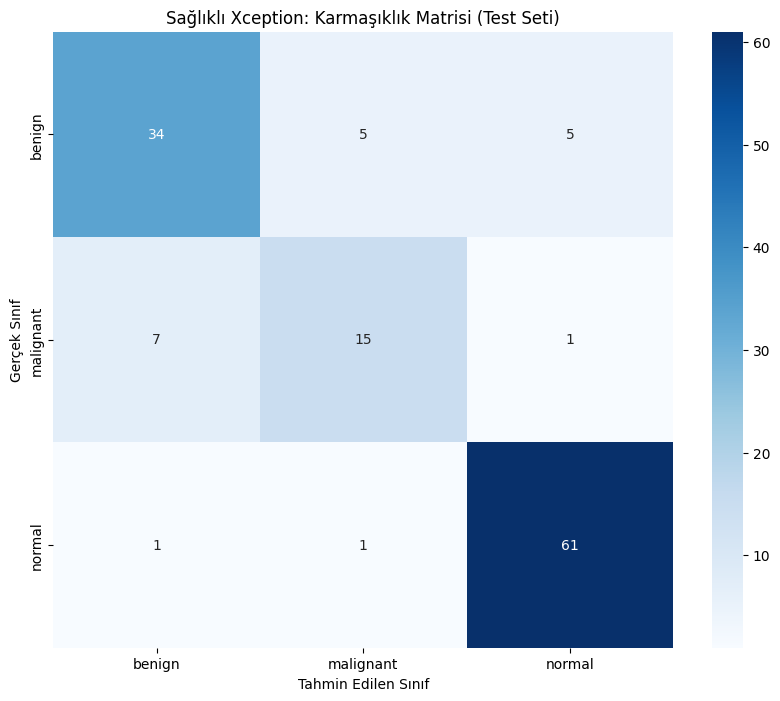

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1. Modeli ve Test Verisini Hazırla
best_model = load_model("/content/drive/MyDrive/Ara Proje/saved_models/Xception_Results/XCEPTION_DomainAD_again.keras")
test_path = "/content/domain_data/content/final_dataset/test"
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    shuffle=False
)

# 2. Tahminleri Al
Y_pred = best_model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes
labels = list(test_generator.class_indices.keys())

# 3. Raporu Yazdır
print("\n--- 🛡️ SAĞLIKLI XCEPTION (3. EPOCH) TEST RAPORU ---")
print(classification_report(y_true, y_pred, target_names=labels))

# 4. Karmaşıklık Matrisi
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.title('Sağlıklı Xception: Karmaşıklık Matrisi (Test Seti)')
plt.ylabel('Gerçek Sınıf')
plt.xlabel('Tahmin Edilen Sınıf')
plt.show()

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# 1. Sağlıklı Modeli Yükle
best_model_path = "/content/drive/MyDrive/Ara Proje/saved_models/Xception_Results/XCEPTION_DomainAD_again.keras"
best_model = load_model(best_model_path)

# 2. Resim Yolunu Belirle
ACTUAL_IMAGE_PATH = "/content/deneme"

def final_test(model_instance, img_folder):
    class_names = ['Benign', 'Malignant', 'Normal']
    img_paths = [os.path.join(img_folder, f) for f in os.listdir(img_folder)
                 if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    print(f"{'Dosya Adı':<15} | {'Model Tahmini':<15}")
    print("-" * 35)

    for img_path in sorted(img_paths):
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img) / 255.0
        x = np.expand_dims(x, axis=0)

        preds = model_instance.predict(x, verbose=0)
        result = class_names[np.argmax(preds)]
        print(f"{os.path.basename(img_path):<15} | {result:<15}")

# 3. Testi Başlat
final_test(best_model, ACTUAL_IMAGE_PATH)

FileNotFoundError: [Errno 2] No such file or directory: '/content/deneme'

In [ ]:
!ls -R /content/deneme.zip

/content/deneme.zip


In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# --- 1. ADIM: ZİP DOSYASINI AÇ ---
# Eğer dosya ismi tam olarak deneme.zip ise:
!unzip -o -q "/content/deneme.zip" -d /content/yeni_test/

# --- 2. ADIM: MODELİ YÜKLE ---
# Daha önce kaydettiğimiz sağlıklı modelin yolu
model_path = "/content/drive/MyDrive/Ara Proje/saved_models/Xception_Results/XCEPTION_DomainAD_again.keras"
model_final = load_model(model_path)

# --- 3. ADIM: TAHMİN FONKSİYONU ---
def run_bulk_test(model_instance, base_folder):
    class_names = ['Benign', 'Malignant', 'Normal']
    found_files = []

    # Alt klasörleri tara (zip içinden klasör çıksa bile bulur)
    for root, dirs, files in os.walk(base_folder):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                found_files.append(os.path.join(root, file))

    if not found_files:
        print(f"❌ HATA: {base_folder} içinde resim bulunamadı! Lütfen dosya adını kontrol et.")
        return

    print(f"✅ Toplam {len(found_files)} yeni resim analiz ediliyor...\n")
    print(f"{'Dosya Adı':<30} | {'Model Tahmini':<15}")
    print("-" * 50)

    # Sonuçları saymak için sayaçlar
    counts = {'Benign': 0, 'Malignant': 0, 'Normal': 0}

    for img_path in sorted(found_files):
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img) / 255.0
        x = np.expand_dims(x, axis=0)

        preds = model_instance.predict(x, verbose=0)
        result = class_names[np.argmax(preds)]
        counts[result] += 1
        print(f"{os.path.basename(img_path):<30} | {result:<15}")

    print("\n" + "="*50)
    print("📊 ÖZET İSTATİSTİKLER:")
    for cls, count in counts.items():
        print(f"- {cls}: {count} adet")

# Çalıştır
run_bulk_test(model_final, "/content/yeni_test/")

✅ Toplam 18 yeni resim analiz ediliyor...

Dosya Adı                      | Model Tahmini  
--------------------------------------------------
benign (100)-rotated1-rotated2.png | Malignant      
benign (101)-rotated1.jpg      | Benign         
benign (101)-sharpened.jpg     | Benign         
benign (102)-rotated2-rotated1.png | Benign         
benign (103)-rotated2-rotated1.png | Benign         
benign (105)-rotated2-rotated2.png | Benign         
benign (105)-rotated2.png      | Benign         
benign (107)-rotated2-sharpened.png | Benign         
benign (108)-rotated2-rotated2.png | Malignant      
benign (110)-sharpened-sharpened.png | Benign         
benign (111)-rotated1-sharpened.png | Benign         
malignant (105)-rotated32.png  | Malignant      
malignant (106)-sharpened-rotated32.png | Benign         
malignant (107)-rotated1-rotated32.png | Benign         
malignant (108)-rotated1-rotated32.png | Malignant      
malignant (109)-rotated1-rotated32.png | Malignant      
mali

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1. Modeli ve Test Verisini Hazırla
model_path = "/content/drive/MyDrive/Ara Proje/saved_models/Xception_Results/XCEPTION_DomainAD_All_data.keras"
best_model = load_model(model_path)

test_path = "/content/domain_data/content/final_dataset/test"
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    shuffle=False
)

# 2. Tahminleri Al
Y_pred = best_model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes

# 3. TOTAL (GENEL) METRİKLERİ HESAPLA
total_accuracy = accuracy_score(y_true, y_pred)
total_precision = precision_score(y_true, y_pred, average='weighted')
total_recall = recall_score(y_true, y_pred, average='weighted')
total_f1 = f1_score(y_true, y_pred, average='weighted')

print("\n" + "="*40)
print("🛡️ SAĞLIKLI XCEPTION (3. EPOCH) TOTAL METRİKLER")
print("="*40)
print(f"Toplam Doğruluk (Accuracy)  : {total_accuracy:.4f}")
print(f"Genel Kesinlik (Precision) : {total_precision:.4f}")
print(f"Genel Duyarlılık (Recall)  : {total_recall:.4f}")
print(f"Genel F1-Skoru (F1-Score)  : {total_f1:.4f}")
print("="*40)

Found 130 images belonging to 3 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 686ms/step

🛡️ SAĞLIKLI XCEPTION (3. EPOCH) TOTAL METRİKLER
Toplam Doğruluk (Accuracy)  : 0.8462
Genel Kesinlik (Precision) : 0.8416
Genel Duyarlılık (Recall)  : 0.8462
Genel F1-Skoru (F1-Score)  : 0.8430
